# Разведочный анализ данных.

**EDA** - Exploratory Data Analysis

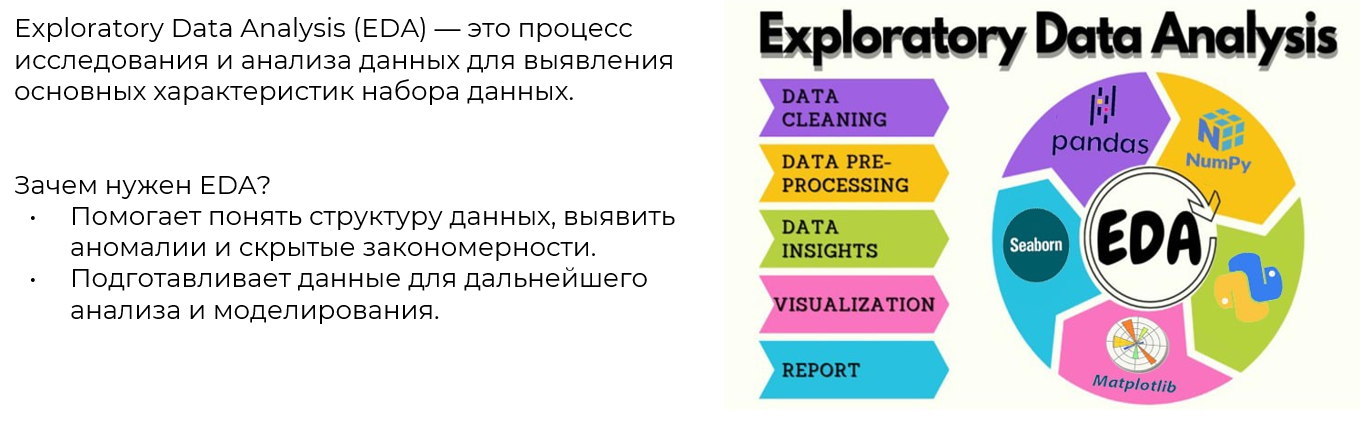

**Зачем?**
- Помогает понять как устроены данные
- Первая проверка фичей на "адекватность"
- _Генерация новых фичей_ - вклад в качество будущей модели

**3 шага EDA в Data Science**
1. Распределение целевой переменной
2. Анализ зависимостей между признаками
3. Анализ влияния признаков на таргет

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [2]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

## 0. Первый взгляд на DataSet

### Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [3]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Обзор количественных переменных

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Обзор категориальных переменных

In [8]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9131
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
-                5
Name: count, dtype: int64

In [10]:
df['ocean_proximity'].value_counts(normalize=True)

ocean_proximity
<1H OCEAN     0.442393
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
-             0.000242
Name: proportion, dtype: float64

In [11]:
df['ocean_proximity'].nunique()

6

In [12]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND', '-'],
      dtype=object)

## 1. Распределение целевой переменной

Помните про различие среднего арифметическое, медианы, моды:
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

[1, 2, 2, 3, 4, 6, 8]
median = 3.0
mean = 3.7142857142857144
mode = 2


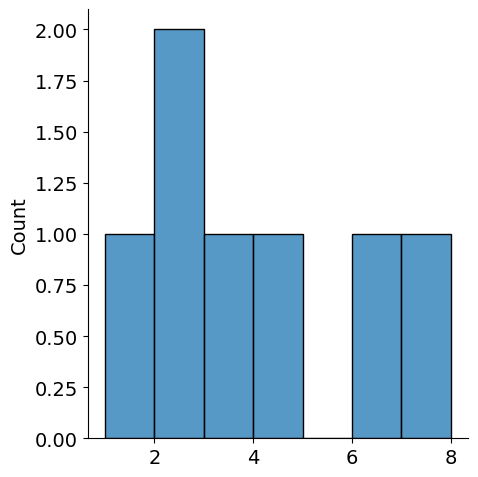

In [13]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.array([1, 4, 2, 6, 3, 8, 2])
print(sorted(x))

# Вычисление статистических значений
mean = np.mean(x)
median = np.quantile(x, q=0.5)
mode = stats.mode(x)


print(f'median = {median}\nmean = {mean}\nmode = {mode[0]}')

# Визуализация данных
sns.displot(x, bins=len(x));


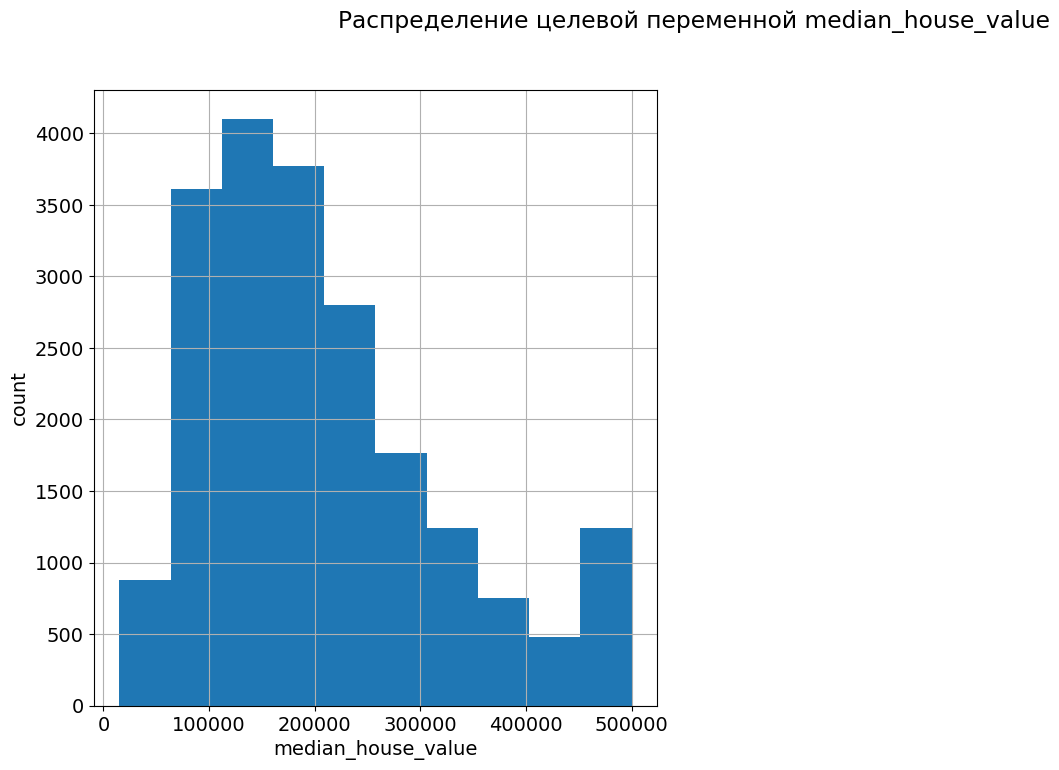

In [14]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
df['median_house_value'].hist()
plt.ylabel('count')
plt.xlabel('median_house_value')


plt.suptitle('Распределение целевой переменной median_house_value')
plt.show()

In [15]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

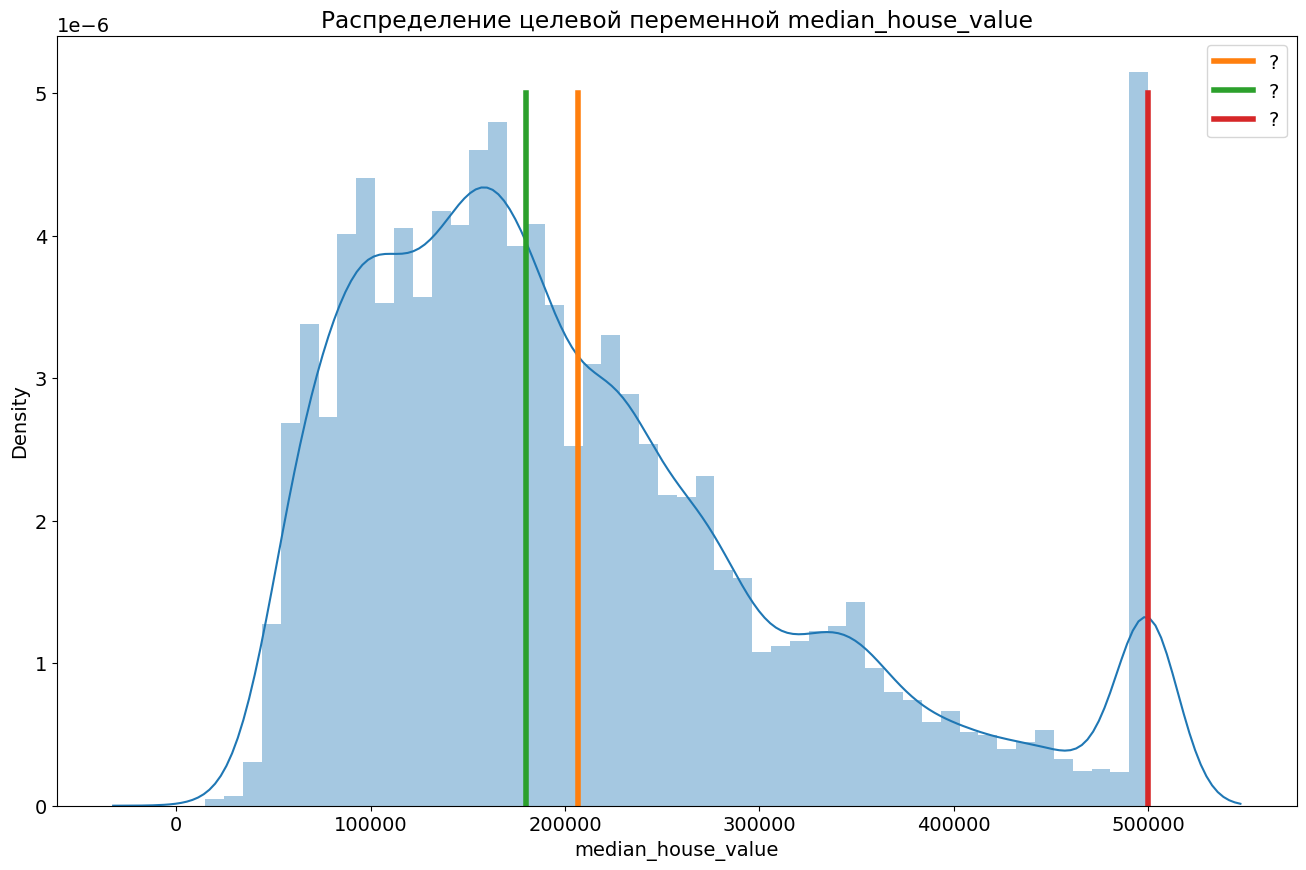

In [16]:

plt.figure(figsize = (16, 10))


sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='?',  linewidth=4)
plt.plot([target_median] * 10, y, label='?',  linewidth=4)
plt.plot([target_mode] * 10, y, label='?', linewidth=4)

plt.title('Распределение целевой переменной median_house_value')
plt.legend()
plt.show()

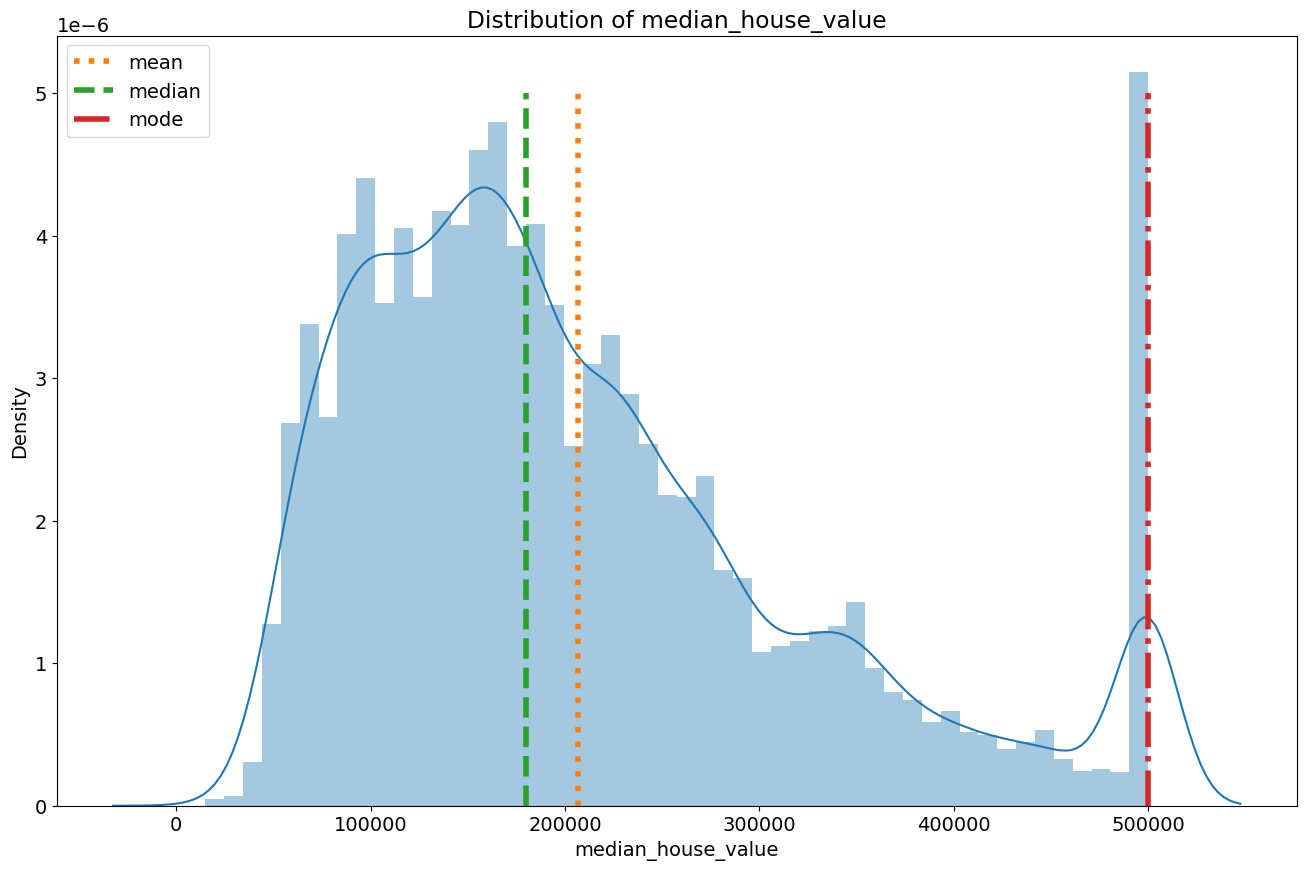

In [17]:
plt.figure(figsize = (16, 10))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

## 2. Анализ зависимостей между признаками

### 2.1 Количественные признаки

In [18]:
# выделяем количественный признаки и удаляем целевую переменную
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

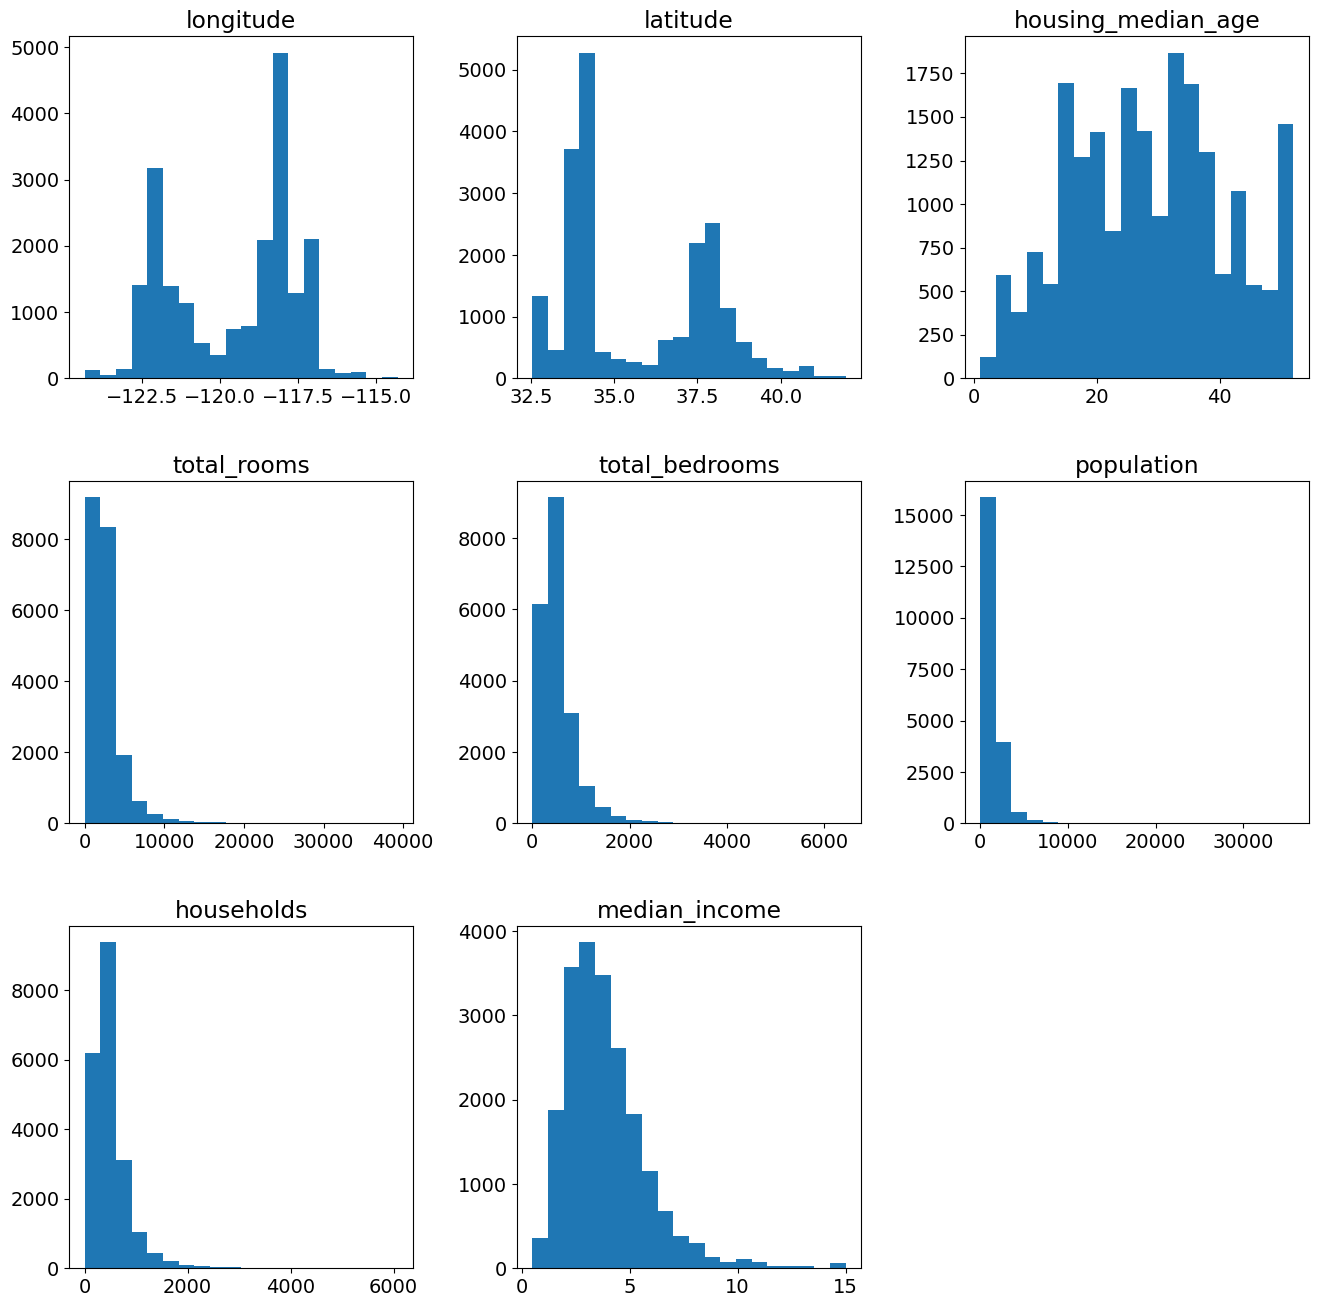

In [19]:
# строим распределение каждого из признаков
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

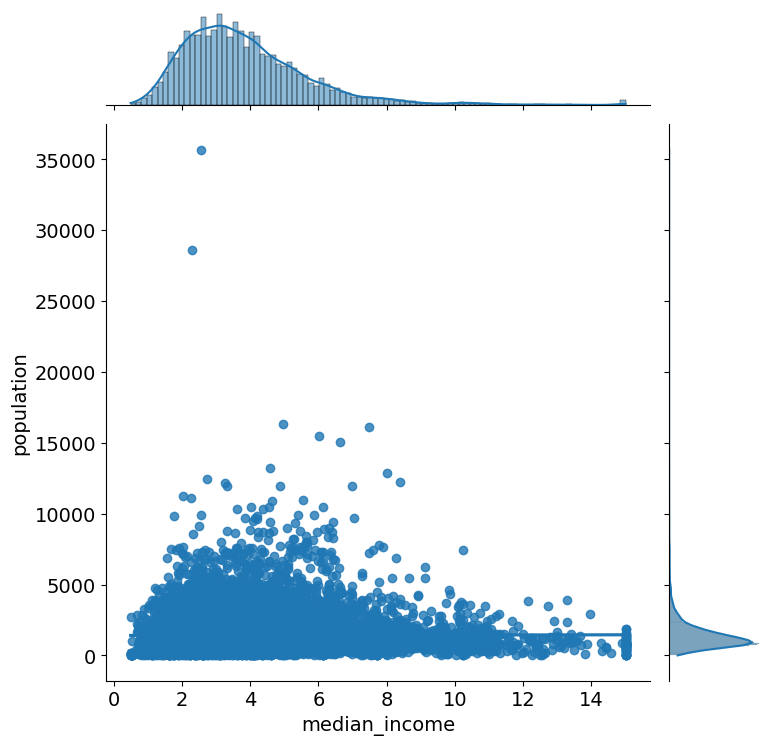

In [20]:
# анализ взаимодействия фичей друг от друга
grid = sns.jointplot(x='median_income', y='population', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

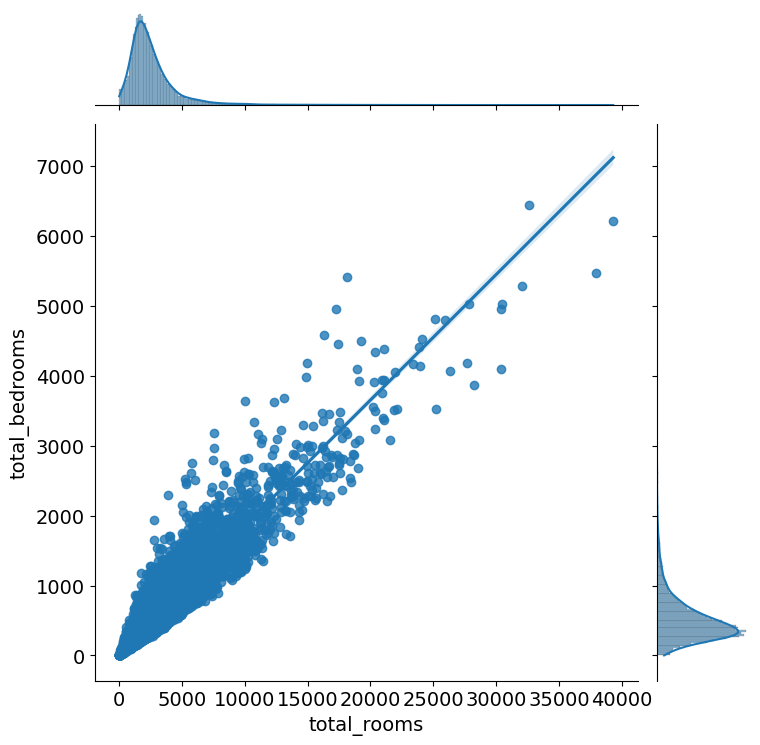

In [21]:
grid = sns.jointplot(x='total_rooms', y='total_bedrooms', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

### 2.2 Матрица корреляций

- Считается для количественных признаков
- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Коррелиция - мера только __линейной__ связи

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


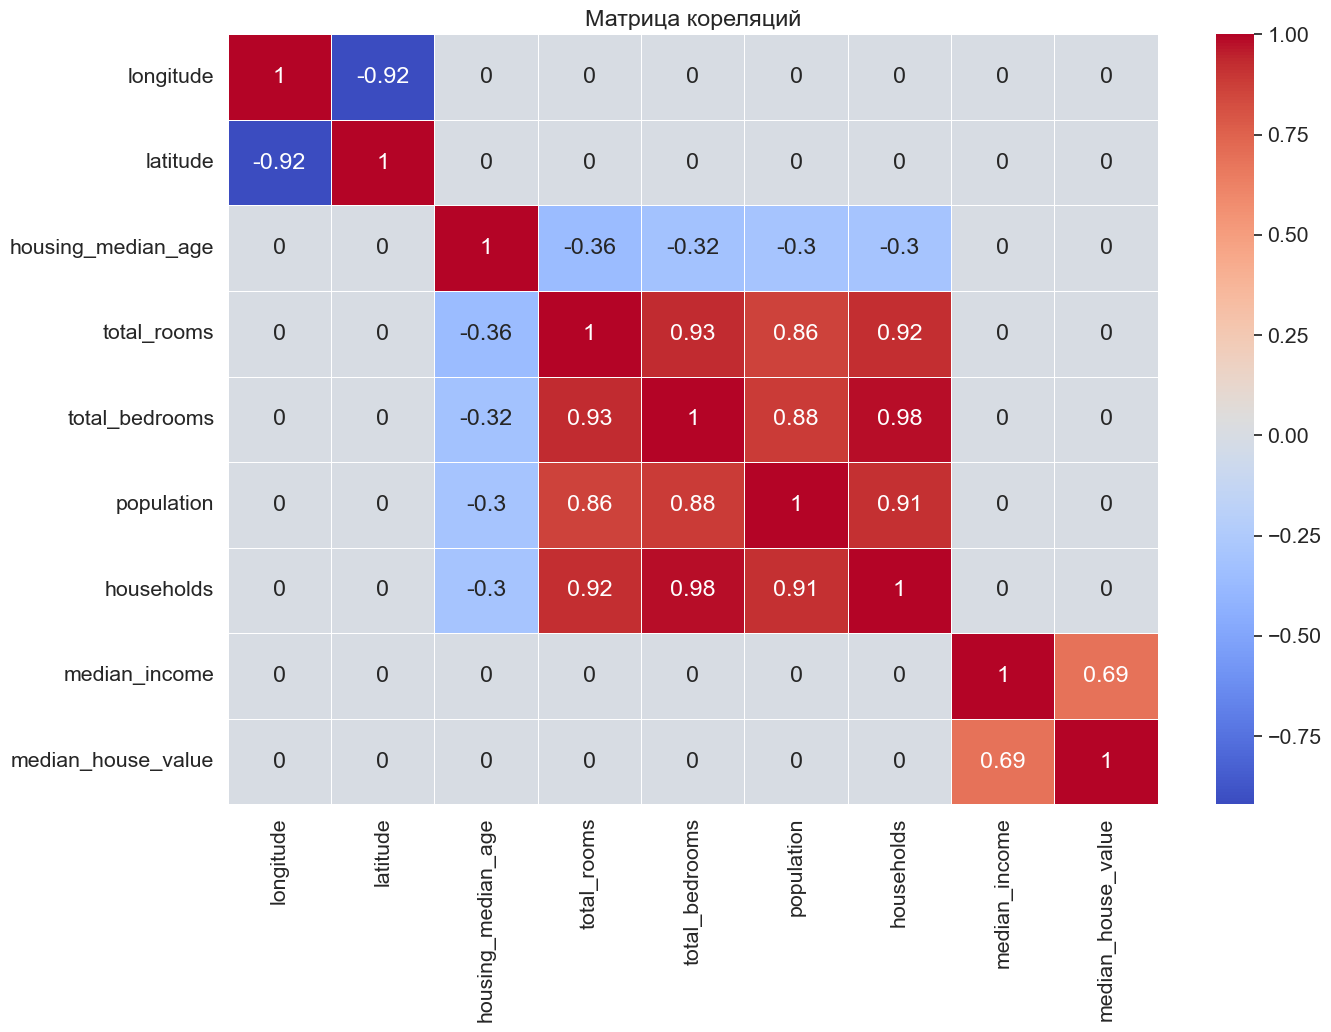

In [23]:
plt.figure(figsize = (15,10))

sns.set_theme(font_scale=1.4)

corr_matrix = df.select_dtypes(include=['float64']).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица кореляций')
plt.show()

### 2.3 Категориальные признаки

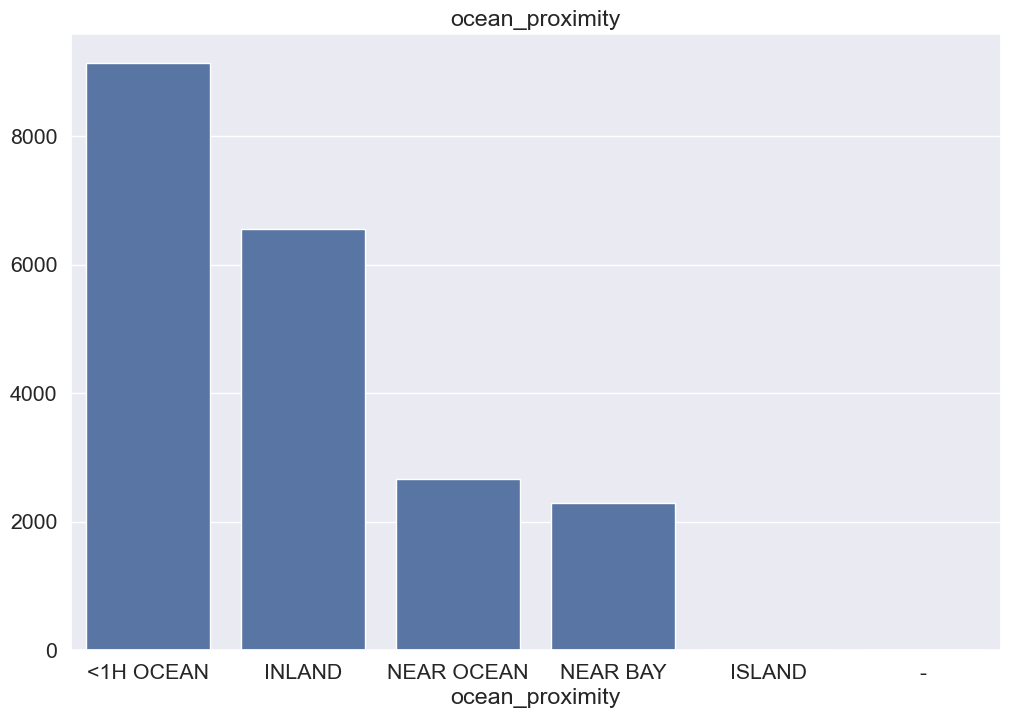

In [24]:
counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(12,8))
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

## 3. Анализ влияния признаков на таргет

### 3.1 Количественные признаки

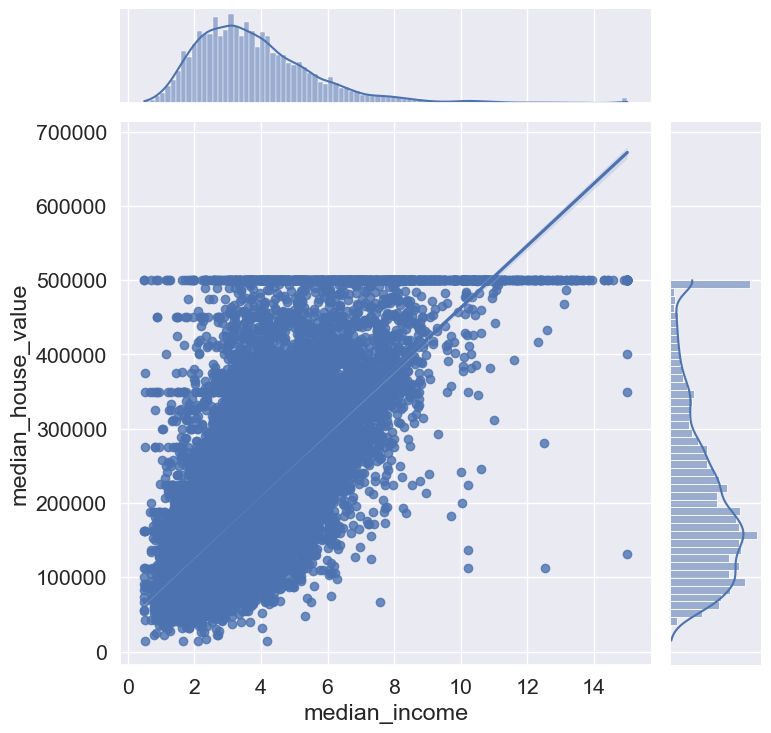

In [25]:
# анализ взаимодействия количественного признака на таргет
grid = sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

### 3.2 Категориальные / бинарные признаки

#### box plot

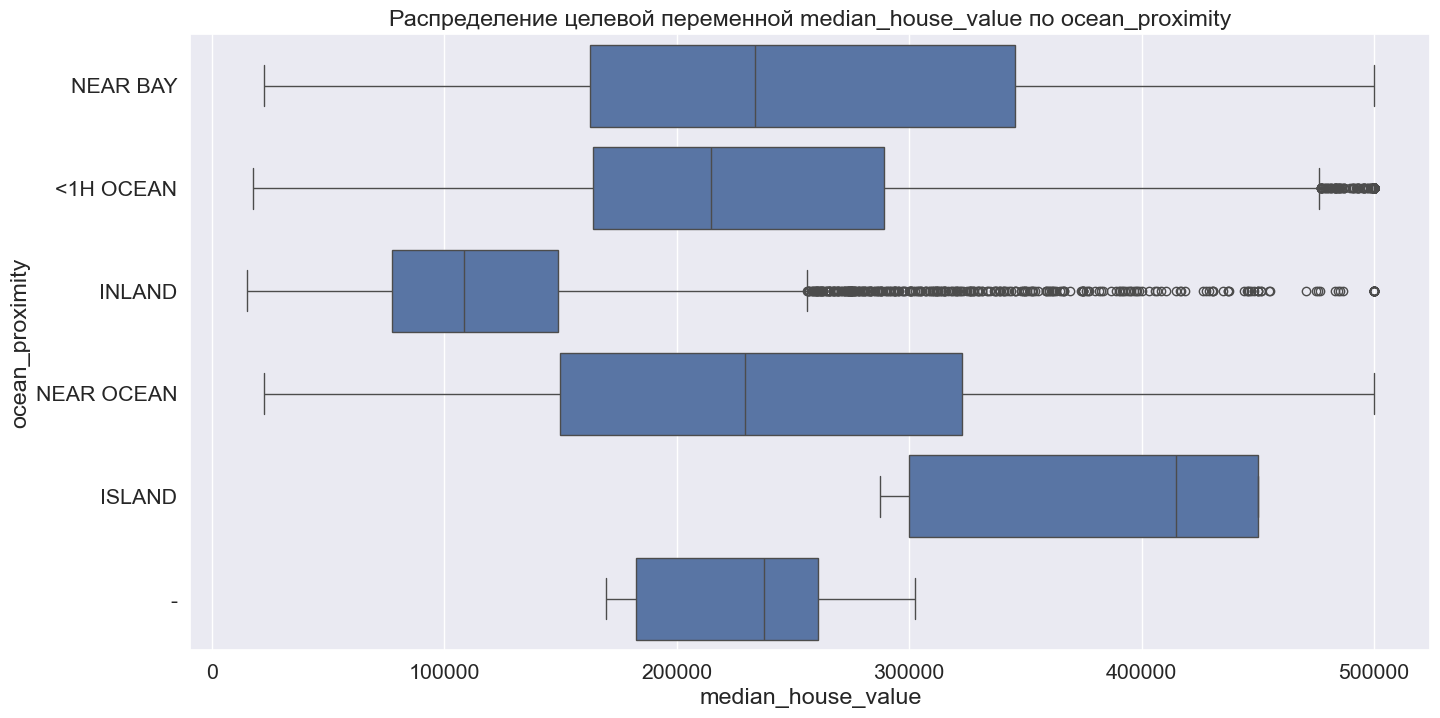

In [26]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='median_house_value', y='ocean_proximity', data=df)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Распределение целевой переменной median_house_value по ocean_proximity')
plt.show()

**Как строится box plot**  



- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25),
- ...

*Интерквартильный размах = q75 - q25

#### Violin plot

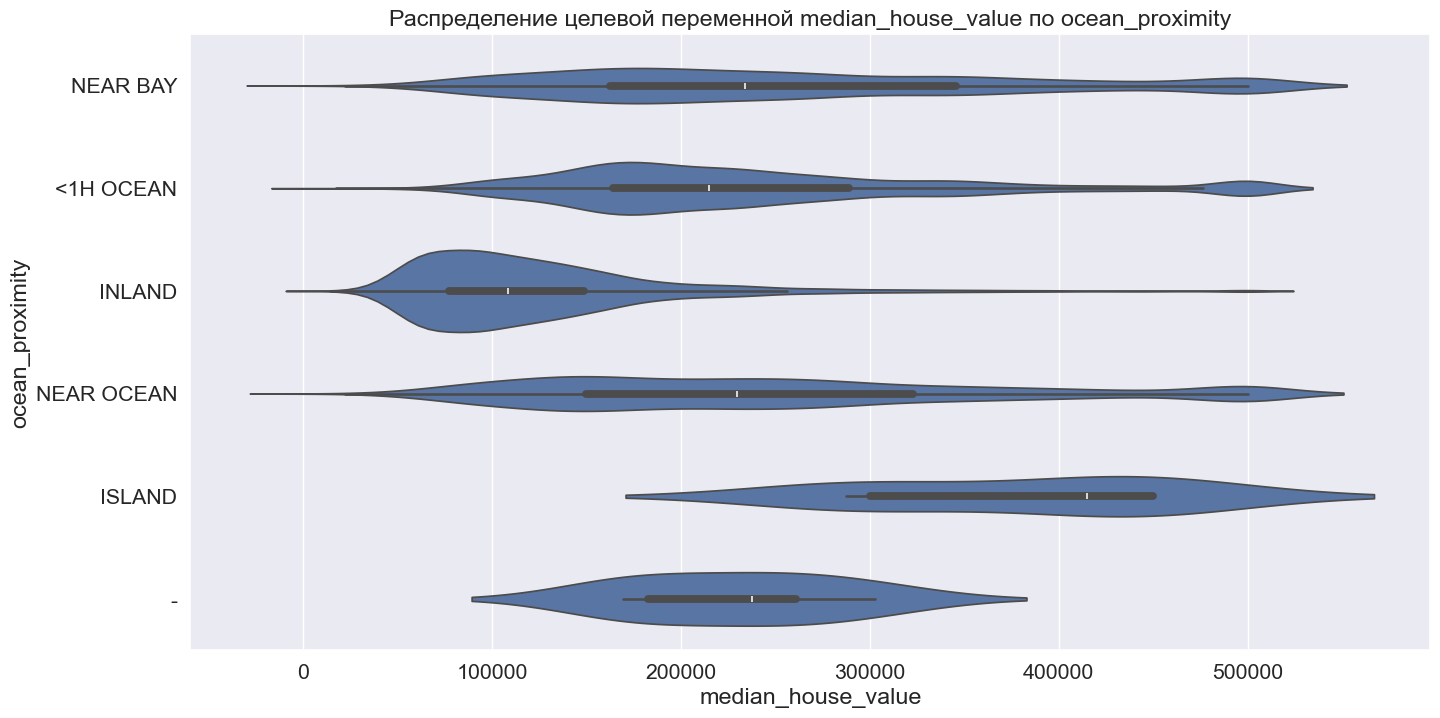

In [27]:
plt.figure(figsize=(16, 8))

sns.violinplot(x='median_house_value', y='ocean_proximity', data=df)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Распределение целевой переменной median_house_value по ocean_proximity')
plt.show()

### 3.3 Гео данные*

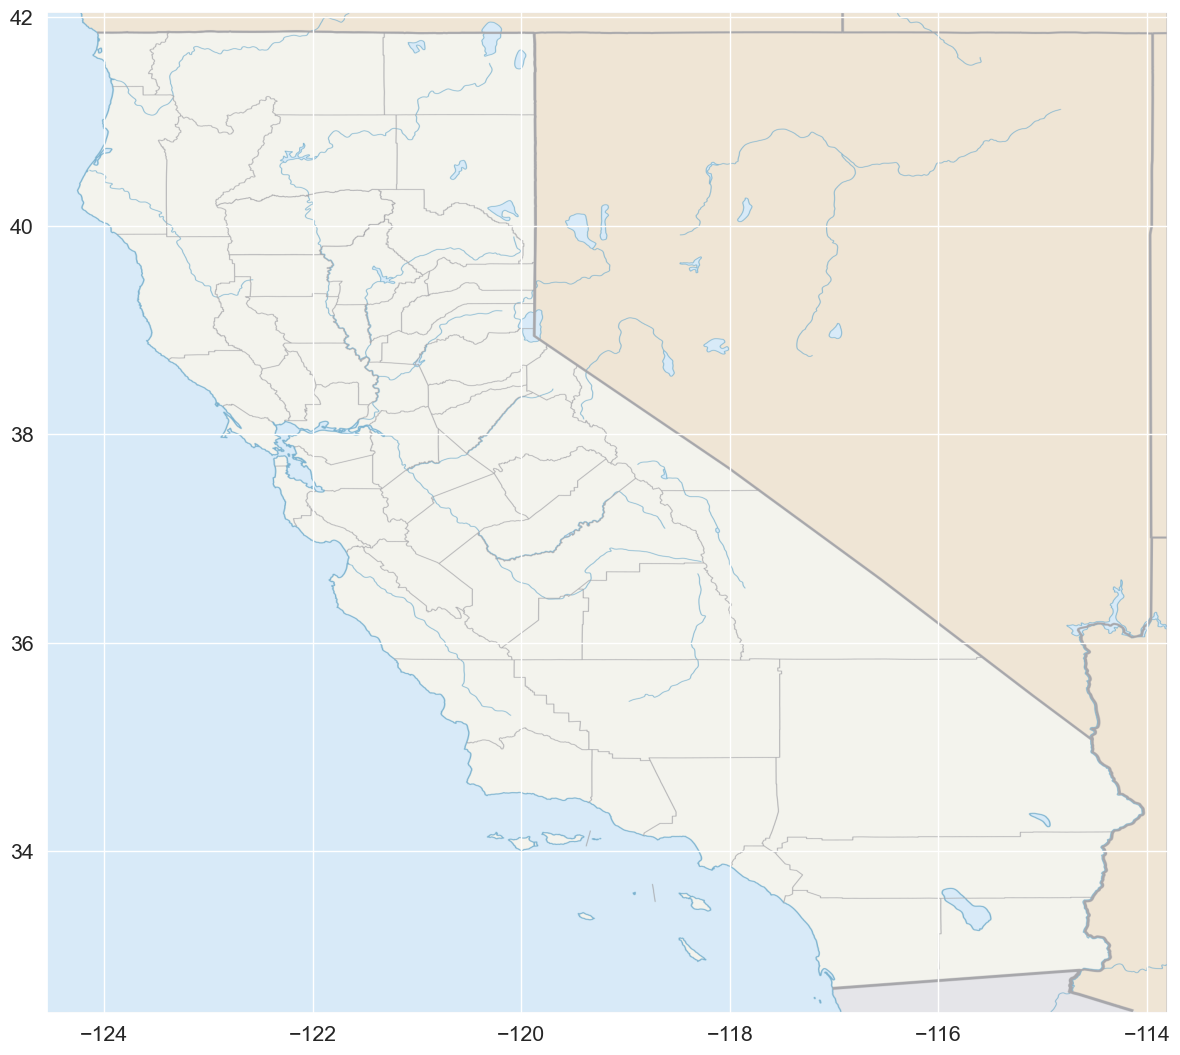

In [28]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

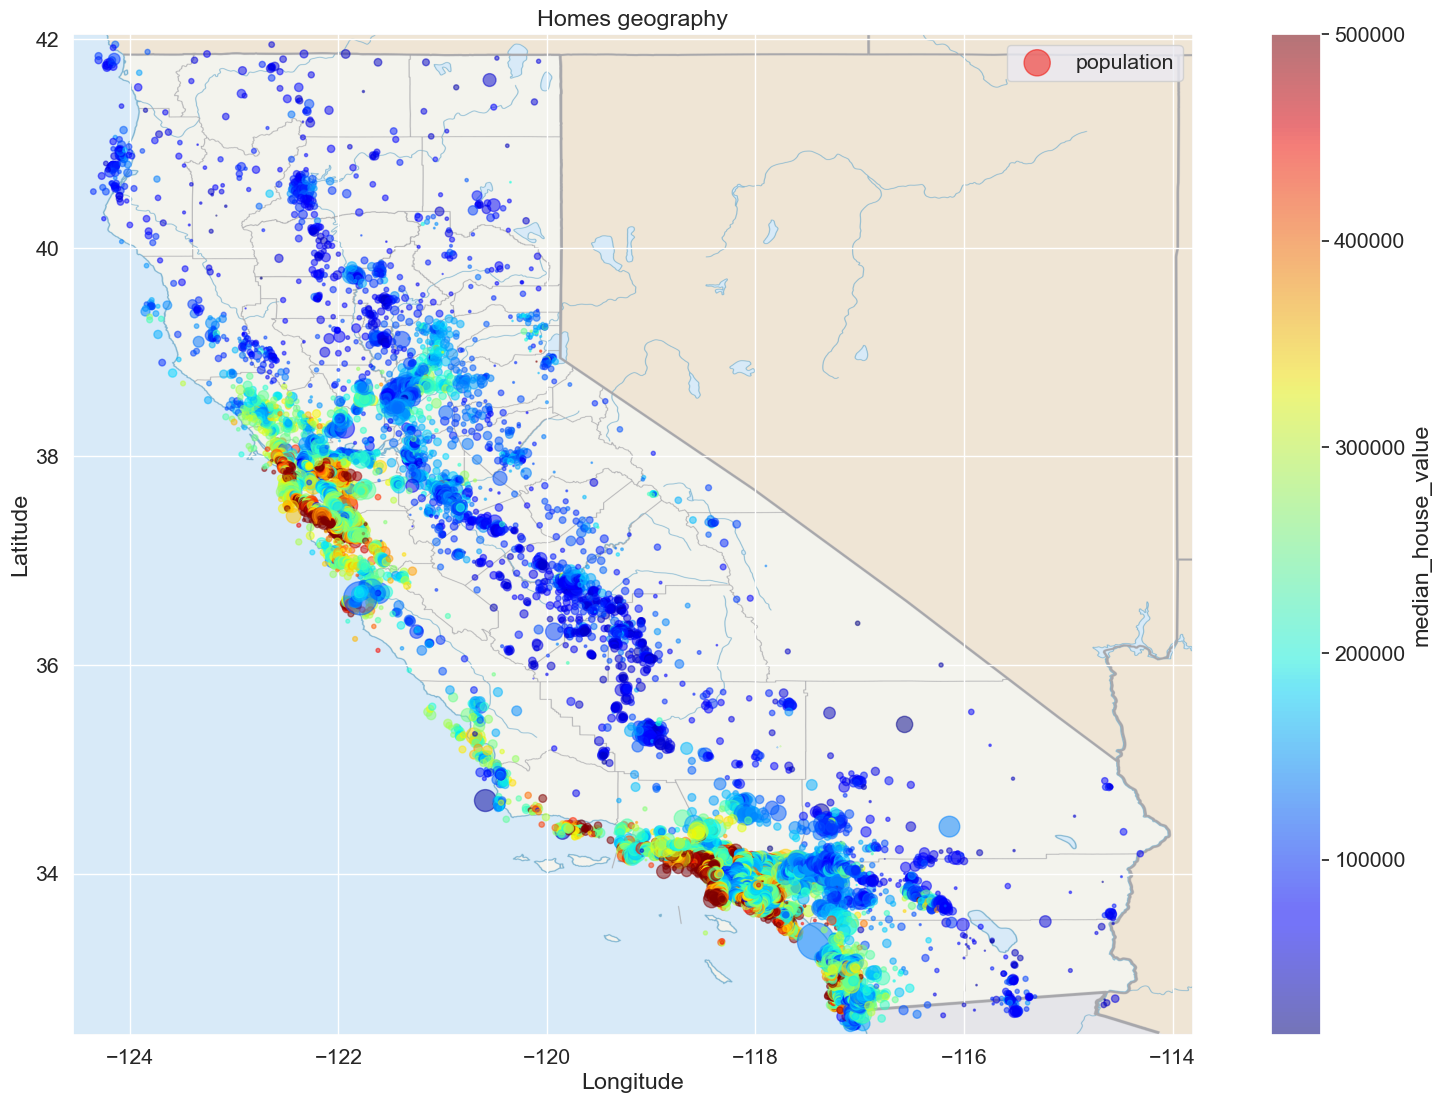

In [29]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
        s=df['population'] / 50, label='population', c='median_house_value',
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend()
plt.show()